
# Project:  TMDb Movie Dataset Investigation

Welcome to the TMDb Movie Dataset investigation. The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including Vote ratings, Movie release year, Budget and Revenue. I would like to find other intresting patterns in the dataset.

#### Observations

* Total Observation: 10,866
* Total Columns: 12
* Some columns contains null values


### Question(s) for Analysis

In this analysis, we will be exploring the following questions:

* Which movie has the highest vote average?
* Which movie has the lowest vote average?
* Which year has the highest movie release?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

Observe dataset and keep useful information relating to our analysis. 
Identifying duplicate values and delete it. 
Verify datatypes and correct if assigned wrong datatypes


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#load data tail
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
#Print out dataset info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

In [6]:
#Count sum of missing info for each variable
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#View data summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Wrangling Findings

* release_date has a wrong data type
* 1 duplicate detected
* 10,866 observations and 12 columns
* some informations in; imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies are missing.
* Some movies budget, revenue, budget_adj, and revenue_adj have a value of '0'


### Data Cleaning

* Remove duplicate rows from the dataset
* Changed format of release date into datetime format
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#  cleaned, perform those cleaning steps in the second part of this section.

#Change the release_date datatype from int64 to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#Count total numbers of duplicate rows and drop them
sum(df.duplicated())
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

<a id='eda'></a>
## Exploratory Data Analysis

Create a function called myPiePlot to easily help in ploting a pie chart and avoid repetitive coding.


### Research Question 1 (Which movie has the highest vote average?)

In [9]:
# Create defined function
def myPiePlot(df_pie,average,lowest=True,num=5,color=None,round=2):
# Data preparation
    data= df.sort_values(average, ascending=lowest).head(5)
# Set plot dimensions
    plt.figure(figsize=[14,6])
# Plot
    plt.pie(data[average],labels=data[average].round(round),colors=color)
# Add title and format it
    plt.title(f'{"Lowest" if lowest else "Top"} {num} movies by {average}', fontsize = 14,weight ="bold", y = 1.)
# Legend
    plt.legend(data['original_title'],title = 'Movies', bbox_to_anchor=(1,0.7))
# Center Plot
    plt.axis('equal')

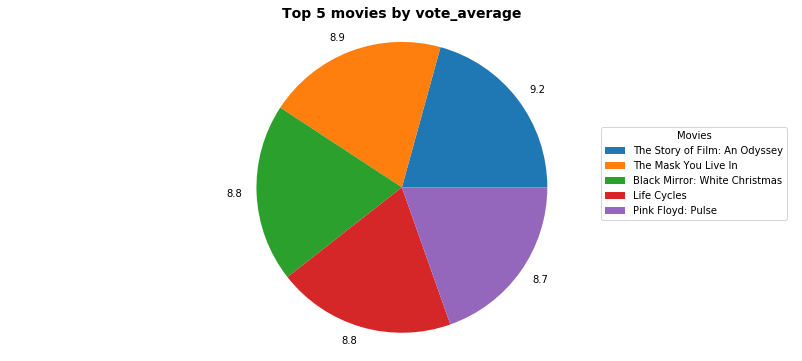

In [10]:
# Call plot function for top 5 vote average movies
myPiePlot(df,'vote_average',lowest=False)

##### This Pie Chart shows the five highest voted movies from 1960 to 2016

### Research Question 2  (Which year has the lowest movie release?)

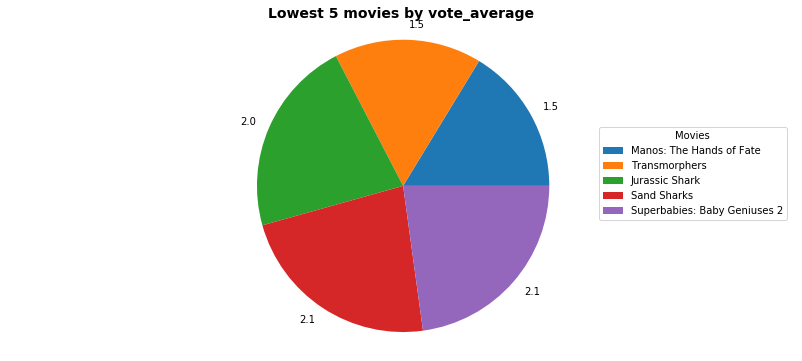

In [11]:
# Call plot function for top 5 vote average movies
myPiePlot(df,'vote_average')

##### This Pie Chart shows the five lowest voted movies from 1960 to 2016

### Research Question 3  (Which year has the highest movie release?)

In [12]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_movies = df.groupby('release_year').count()['id']
print(df_movies.tail())

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


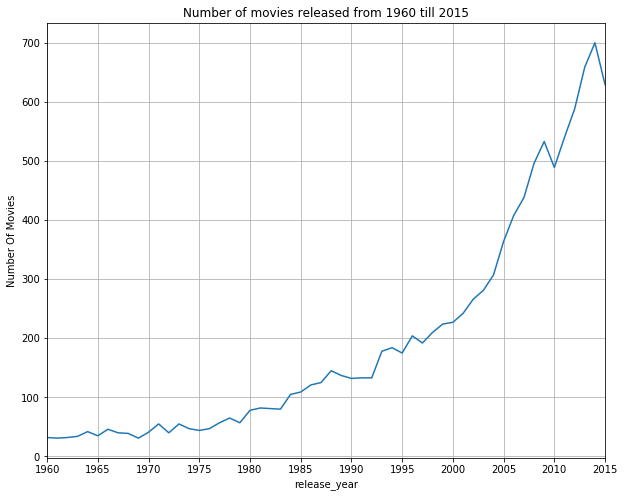

In [13]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
plt.figure(figsize = (10,8))
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
plt.title("Number of movies released from 1960 till 2015")
plt.ylabel('Number Of Movies')
plt.grid()
plt.show()

<a id='conclusions'></a>
## Conclusions

There are 10,866 observations and 21 columns in the __*TMDb-movies*__ dataset.
* The most voted movie has a vote_average of 9.2 with movie title name _"The Story of Film: An Odyssey"_ which was released in the year 2011.
* There are two least voted movies. _"Manos: The Hands of Fate"_ and _"Transmophers"_ which has 1.5 vote_average and was released in the year 1966 and 2007 respectively.
* The year 2014 has the highest count of movies released, followed by year 2013 and 2015 with movie numbers  (700), (659) and (629) respectively.



### Limitations

During the exploratory stage, i created a function that helps preventing re-writing codes for pie chart. This took a lot of time to write and critical thinking.

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0